## Name: Thiago de Oliveira da Costa - StId: 2020005
### GitHub:  https://github.com/ThBrasilDaCosta/ML-Firewall-Inc-Traffic

### Project: Machine Learning Firewall Incoming Traffic.

##### Importing necessary labraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading CSV file:

In [2]:
firewall_traffic = pd.read_csv('log2.csv')

##### Data Understanding:

In [3]:
firewall_traffic.shape

(65532, 12)

In [4]:
firewall_traffic.head(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
5,51465,443,39975,443,3961,1595,2366,21,16,12,9,allow
6,60513,47094,45469,47094,320,140,180,6,7,3,3,allow
7,50049,443,21285,443,7912,3269,4643,23,96,12,11,allow
8,52244,58774,2211,58774,70,70,0,1,5,1,0,allow
9,50627,443,16215,443,8256,1674,6582,31,75,15,16,allow


In [5]:
firewall_traffic.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
Action                  object
dtype: object

In [6]:
firewall_traffic.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [7]:
firewall_traffic.isna().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

In [8]:
firewall_traffic.loc[firewall_traffic.duplicated()]

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
268,21268,62609,0,0,146,146,0,1,0,1,0,deny
351,48706,23393,0,0,60,60,0,1,0,1,0,deny
593,65003,57470,0,0,78,78,0,1,0,1,0,deny
632,443,49988,0,0,82,82,0,1,0,1,0,deny
661,10669,49756,0,0,60,60,0,1,0,1,0,deny
...,...,...,...,...,...,...,...,...,...,...,...,...
65517,54874,445,0,0,70,70,0,1,0,1,0,drop
65519,49784,445,0,0,70,70,0,1,0,1,0,drop
65521,42995,26467,0,0,62,62,0,1,0,1,0,deny
65522,53314,64097,0,0,66,66,0,1,0,1,0,deny


In [9]:
firewall_traffic.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received',
       'Action'],
      dtype='object')

##### Data cleaning:

In [10]:
firewall_traffic = firewall_traffic.loc[~firewall_traffic.duplicated(subset=['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received',
       'Action'])].reset_index(drop=True).copy()

In [11]:
firewall_traffic

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
...,...,...,...,...,...,...,...,...,...,...,...,...
57165,51710,43069,65147,43069,70,70,0,2,8,2,0,allow
57166,63691,80,13237,80,314,192,122,6,15,4,2,allow
57167,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,allow
57168,54871,445,0,0,70,70,0,1,0,1,0,drop


In [12]:
print('Dataser sahpe after dropping duplicated rows: ', firewall_traffic.shape)

Dataser sahpe after dropping duplicated rows:  (57170, 12)


In [13]:
firewall_traffic.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,57170.000000,57170.000000,57170.000000,57170.000000,5.717000e+04,5.717000e+04,5.717000e+04,5.717000e+04,57170.000000,57170.000000,57170.000000
mean,50532.499738,8052.147035,22048.739549,3054.123491,1.113147e+05,2.564701e+04,8.566766e+04,1.177065e+02,75.116547,47.279255,70.427200
std,13880.680957,16513.145167,22141.986286,10363.545911,6.015189e+06,4.098545e+06,2.637029e+06,5.495436e+03,322.519323,3446.210063,2380.254144
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49450.000000,53.000000,0.000000,0.000000,7.000000e+01,7.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,54013.000000,443.000000,16362.500000,53.000000,1.930000e+02,9.400000e+01,9.000000e+01,2.000000e+00,26.000000,1.000000,1.000000
75%,58574.000000,445.000000,41883.750000,443.000000,1.139000e+03,5.080000e+02,6.690000e+02,1.000000e+01,31.000000,5.000000,4.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


##### Robust Scaler, Z-Score, Outliers

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
scaler = RobustScaler()
scaled_features = scaler.fit_transform(firewall_traffic[['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']])
robscal_firewwal_traffic = pd.DataFrame(scaled_features, columns=['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'])


In [16]:
z_score_threshold =3
z_scores = robscal_firewwal_traffic.apply(lambda x: np.abs((x - x.mean()) / x.std()))

In [17]:
outliers_z_score = robscal_firewwal_traffic[(z_scores > z_score_threshold).any(axis=1)]

In [18]:
iqr_threshold = 1.5

In [19]:
Q1 = robscal_firewwal_traffic.quantile(0.25)
Q3 = robscal_firewwal_traffic.quantile(0.75)
IQR = Q3 - Q1

In [20]:
outliers_iqr = robscal_firewwal_traffic[((robscal_firewwal_traffic < (Q1 - iqr_threshold * IQR)) | (robscal_firewwal_traffic > (Q3 + iqr_threshold * IQR))).any(axis=1)]

In [21]:
outliers = pd.concat([outliers_z_score, outliers_iqr]).drop_duplicates()

In [22]:
filtered_data = firewall_traffic.drop(outliers.index)

In [23]:
print("Shape of the dataset after outlier removal:", filtered_data.shape)

Shape of the dataset after outlier removal: (44483, 12)


In [24]:
filtered_data.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,44483.000000,44483.000000,44483.000000,44483.000000,44483.000000,44483.000000,44483.000000,44483.000000,44483.000000,44483.000000,44483.000000
mean,50858.787852,9863.095272,18472.950026,3466.468044,333.407234,144.760313,188.646921,2.433177,35.314480,1.570375,0.862802
std,14507.698943,17922.939872,21708.871592,11144.397305,1104.376584,288.030351,908.059746,3.365282,180.776416,1.790513,1.704060
min,0.000000,0.000000,0.000000,0.000000,60.000000,60.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,49718.500000,53.000000,0.000000,0.000000,70.000000,70.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,55125.000000,445.000000,6876.000000,53.000000,146.000000,85.000000,0.000000,2.000000,7.000000,1.000000,0.000000
75%,59275.000000,10197.000000,36806.500000,53.000000,220.000000,102.000000,111.000000,2.000000,30.000000,1.000000,1.000000
max,65534.000000,65504.000000,65535.000000,65427.000000,92573.000000,14436.000000,88054.000000,108.000000,3632.000000,55.000000,66.000000


##### MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(filtered_data[['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']])
firewall_traffic_scaled = pd.DataFrame(scaled_features, columns=['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'])



In [27]:
firewall_traffic_scaled

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.001265,0.002365,0.000943,0.009346,0.008260,0.000000,0.015152
1,0.002810,0.005565,0.002044,0.046729,0.001927,0.037037,0.045455
2,0.000108,0.000696,0.000000,0.000000,0.001377,0.000000,0.000000
3,0.006875,0.022120,0.003611,0.102804,0.009637,0.111111,0.075758
4,0.001167,0.001809,0.000931,0.009346,0.008260,0.000000,0.015152
...,...,...,...,...,...,...,...
44478,0.003200,0.004035,0.002703,0.009346,0.008260,0.000000,0.015152
44479,0.000108,0.000696,0.000000,0.009346,0.002203,0.018519,0.000000
44480,0.002746,0.009182,0.001386,0.046729,0.004130,0.055556,0.030303
44481,0.000108,0.000696,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
firewall_traffic.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,57170.000000,57170.000000,57170.000000,57170.000000,5.717000e+04,5.717000e+04,5.717000e+04,5.717000e+04,57170.000000,57170.000000,57170.000000
mean,50532.499738,8052.147035,22048.739549,3054.123491,1.113147e+05,2.564701e+04,8.566766e+04,1.177065e+02,75.116547,47.279255,70.427200
std,13880.680957,16513.145167,22141.986286,10363.545911,6.015189e+06,4.098545e+06,2.637029e+06,5.495436e+03,322.519323,3446.210063,2380.254144
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49450.000000,53.000000,0.000000,0.000000,7.000000e+01,7.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,54013.000000,443.000000,16362.500000,53.000000,1.930000e+02,9.400000e+01,9.000000e+01,2.000000e+00,26.000000,1.000000,1.000000
75%,58574.000000,445.000000,41883.750000,443.000000,1.139000e+03,5.080000e+02,6.690000e+02,1.000000e+01,31.000000,5.000000,4.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [29]:
#firewall_traffic.reset_index(drop=True, inplace=True)
#firewall_traffic_scaled = firewall_traffic_scaled.reindex(firewall_traffic.index)


In [30]:
firewall_traffic[['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']] = firewall_traffic_scaled
firewall_traffic.dropna(subset=['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'], inplace=True)

In [31]:
firewall_traffic

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,0.001265,0.002365,0.000943,0.009346,0.008260,0.000000,0.015152,allow
1,56258,3389,56258,3389,0.002810,0.005565,0.002044,0.046729,0.001927,0.037037,0.045455,allow
2,6881,50321,43265,50321,0.000108,0.000696,0.000000,0.000000,0.001377,0.000000,0.000000,allow
3,50553,3389,50553,3389,0.006875,0.022120,0.003611,0.102804,0.009637,0.111111,0.075758,allow
4,50002,443,45848,443,0.001167,0.001809,0.000931,0.009346,0.008260,0.000000,0.015152,allow
...,...,...,...,...,...,...,...,...,...,...,...,...
44478,11826,53,11826,53,0.003200,0.004035,0.002703,0.009346,0.008260,0.000000,0.015152,allow
44479,55392,53,63211,53,0.000108,0.000696,0.000000,0.009346,0.002203,0.018519,0.000000,allow
44480,59316,443,4398,443,0.002746,0.009182,0.001386,0.046729,0.004130,0.055556,0.030303,allow
44481,56816,12523,45890,12523,0.000108,0.000696,0.000000,0.000000,0.000000,0.000000,0.000000,allow


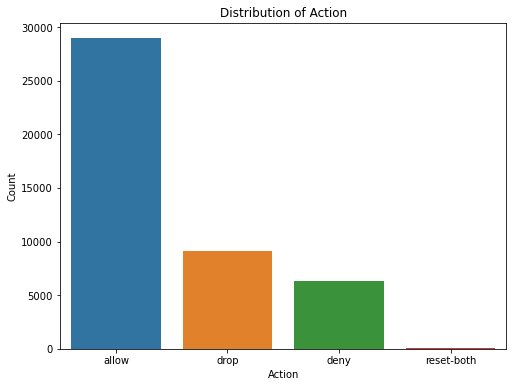

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(data=firewall_traffic, x='Action')
plt.title('Distribution of Action')
plt.xlabel('Action')
plt.ylabel('Count')
plt.show()

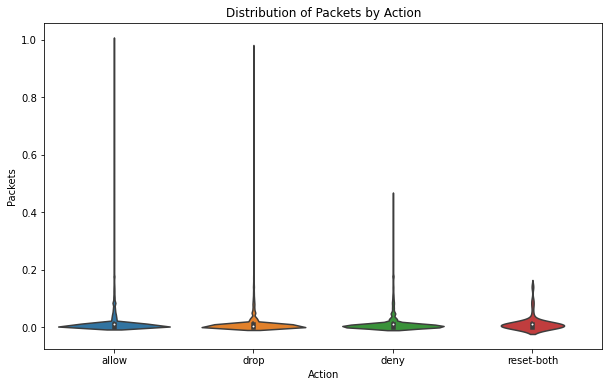

In [33]:
plt.figure(figsize=(10,6))
sns.violinplot(data=firewall_traffic, x='Action', y='Packets')
plt.title('Distribution of Packets by Action')
plt.xlabel('Action')
plt.ylabel('Packets')
plt.show()

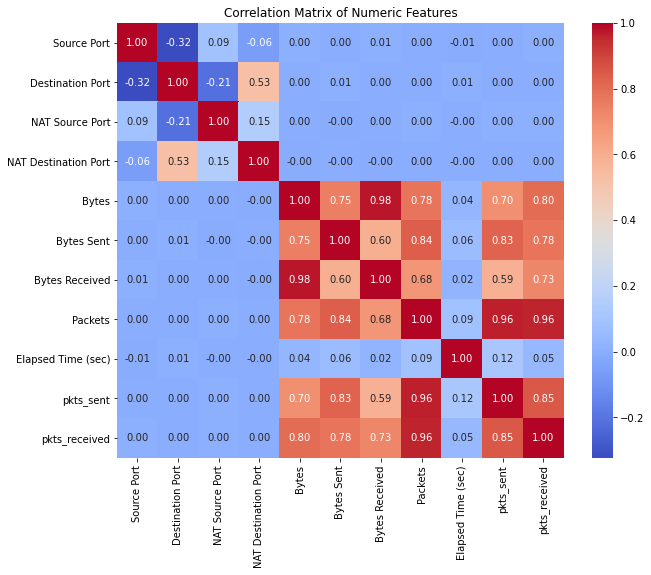

In [34]:
correlation_matrix = firewall_traffic.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

##### Applying encoding method:

In [35]:
firewall_traffic['Action'].unique()

array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
firewall_traffic = firewall_traffic
firewall_traffic.Action = le.fit_transform(firewall_traffic.Action)
firewall_traffic

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,0.001265,0.002365,0.000943,0.009346,0.008260,0.000000,0.015152,0
1,56258,3389,56258,3389,0.002810,0.005565,0.002044,0.046729,0.001927,0.037037,0.045455,0
2,6881,50321,43265,50321,0.000108,0.000696,0.000000,0.000000,0.001377,0.000000,0.000000,0
3,50553,3389,50553,3389,0.006875,0.022120,0.003611,0.102804,0.009637,0.111111,0.075758,0
4,50002,443,45848,443,0.001167,0.001809,0.000931,0.009346,0.008260,0.000000,0.015152,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44478,11826,53,11826,53,0.003200,0.004035,0.002703,0.009346,0.008260,0.000000,0.015152,0
44479,55392,53,63211,53,0.000108,0.000696,0.000000,0.009346,0.002203,0.018519,0.000000,0
44480,59316,443,4398,443,0.002746,0.009182,0.001386,0.046729,0.004130,0.055556,0.030303,0
44481,56816,12523,45890,12523,0.000108,0.000696,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [38]:
firewall_traffic.dtypes

Source Port               int64
Destination Port          int64
NAT Source Port           int64
NAT Destination Port      int64
Bytes                   float64
Bytes Sent              float64
Bytes Received          float64
Packets                 float64
Elapsed Time (sec)      float64
pkts_sent               float64
pkts_received           float64
Action                    int32
dtype: object

In [39]:
firewall_traffic.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,0.001265,0.002365,0.000943,0.009346,0.008260,0.000000,0.015152,0
1,56258,3389,56258,3389,0.002810,0.005565,0.002044,0.046729,0.001927,0.037037,0.045455,0
2,6881,50321,43265,50321,0.000108,0.000696,0.000000,0.000000,0.001377,0.000000,0.000000,0
3,50553,3389,50553,3389,0.006875,0.022120,0.003611,0.102804,0.009637,0.111111,0.075758,0
4,50002,443,45848,443,0.001167,0.001809,0.000931,0.009346,0.008260,0.000000,0.015152,0


In [40]:
firewall_traffic.tail(15)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
44468,55044,53,47229,53,0.001124,0.001669,0.000909,0.009346,0.008535,0.000000,0.015152,0
44469,27005,27016,25142,27016,0.001189,0.001878,0.000943,0.009346,0.008535,0.000000,0.015152,0
44470,27005,27015,25382,27015,0.007037,0.001878,0.007087,0.009346,0.008535,0.000000,0.015152,0
44471,35408,53,57895,53,0.000065,0.000417,0.000000,0.000000,0.000000,0.000000,0.000000,0
44472,44400,443,34284,443,0.000065,0.000417,0.000000,0.000000,0.000000,0.000000,0.000000,0
44473,46544,443,31614,443,0.000065,0.000417,0.000000,0.000000,0.000000,0.000000,0.000000,0
44474,47500,443,47942,443,0.000065,0.000417,0.000000,0.000000,0.000000,0.000000,0.000000,0
44475,52447,443,48925,443,0.000108,0.000696,0.000000,0.000000,0.000000,0.000000,0.000000,0
44476,10056,443,53947,443,0.000065,0.000417,0.000000,0.000000,0.000000,0.000000,0.000000,0
44477,61673,443,54566,443,0.000022,0.000139,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [41]:
firewall_traffic.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received',
       'Action'],
      dtype='object')

In [42]:
independent_features = ['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']

dependent_features = ['Action']

X = firewall_traffic[independent_features]
y = firewall_traffic[dependent_features]

In [43]:
print(X)

       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0            57222                53            54587                    53   
1            56258              3389            56258                  3389   
2             6881             50321            43265                 50321   
3            50553              3389            50553                  3389   
4            50002               443            45848                   443   
...            ...               ...              ...                   ...   
44478        11826                53            11826                    53   
44479        55392                53            63211                    53   
44480        59316               443             4398                   443   
44481        56816             12523            45890                 12523   
44482        46232                53            46232                    53   

          Bytes  Bytes Sent  Bytes Received   Packe

In [44]:
print(y)

       Action
0           0
1           0
2           0
3           0
4           0
...       ...
44478       0
44479       0
44480       0
44481       0
44482       0

[44483 rows x 1 columns]


##### Train_Test_Split method.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17, test_size = 0.2)

In [47]:
X_train.shape

(35586, 11)

In [48]:
X_test.shape

(8897, 11)

In [49]:
y_train.shape

(35586, 1)

In [50]:
y_test.shape

(8897, 1)

##### Decision Tree ML model:

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dtc = DecisionTreeClassifier()

In [53]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred_dtc = dtc.predict(X_test)

In [55]:
dtc.score(X_test, y_test)

0.995279307631786

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
print(confusion_matrix(y_test, y_pred_dtc))

[[5783    6    0    3]
 [   9 1261    6    3]
 [   0   10 1808    0]
 [   4    1    0    3]]


In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5792
           1       0.99      0.99      0.99      1279
           2       1.00      0.99      1.00      1818
           3       0.33      0.38      0.35         8

    accuracy                           1.00      8897
   macro avg       0.83      0.84      0.83      8897
weighted avg       1.00      1.00      1.00      8897



In [60]:
dtc.feature_importances_

array([5.40858627e-03, 3.41750451e-01, 3.57959683e-04, 6.49830629e-01,
       4.41203390e-04, 6.47381035e-04, 5.19762930e-04, 5.47183750e-05,
       7.47323587e-04, 1.45915667e-04, 9.60688072e-05])

In [61]:
X.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received'],
      dtype='object')

In [62]:
features = pd.DataFrame(dtc.feature_importances_, index = X.columns)

In [63]:
features

,0
Source Port,0.005409
Destination Port,0.341750
NAT Source Port,0.000358
NAT Destination Port,0.649831
Bytes,0.000441
Bytes Sent,0.000647
Bytes Received,0.000520
Packets,0.000055
Elapsed Time (sec),0.000747
pkts_sent,0.000146


In [64]:
print(dtc.predict([[57222, 53, 54587, 53, 177, 94, 83, 2, 30, 1, 1]]))

[0]


In [65]:
print(dtc.predict([[54870, 445, 0, 0, 70, 70, 0, 1, 0, 1, 0]]))

[2]


In [66]:
import random

In [67]:
def random_data_generator(X):
    random_data = []
    for feature in X.columns:
        random_data.append(random.choice(X[feature]))
    return [random_data]

random_data = random_data_generator(X)

In [68]:
print(random_data)

[[52709, 53, 59819, 0, 6.485575000270236e-05, 0.0004173622704507513, 0.0012946600949417402, 0.009345794392523364, 0.0, 0.037037037037037035, 0.015151515151515152]]


In [69]:
print(dtc.predict(random_data))

[0]


##### Random Forest ML model:

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [71]:
rf = RandomForestClassifier()

In [72]:
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [73]:
y_pred_rf = rf.predict(X_test)

In [74]:
rf.score(X_test, y_test)

0.9964032820051703

In [75]:
features = pd.DataFrame(rf.feature_importances_, index = X.columns)

In [76]:
features

,0
Source Port,0.088432
Destination Port,0.326511
NAT Source Port,0.297199
NAT Destination Port,0.278679
Bytes,0.002431
Bytes Sent,0.002074
Bytes Received,0.001758
Packets,0.000569
Elapsed Time (sec),0.001482
pkts_sent,0.000426


In [77]:
print(rf.predict([[57222, 53, 54587, 53, 177, 94, 83, 2, 30, 1, 1]]))

[0]


In [78]:
print(rf.predict([[54870, 445, 0, 0, 70, 70, 0, 1, 0, 1, 0]]))

[2]


In [79]:
def random_data_generator(X):
    random_data = []
    for feature in X.columns:
        random_data.append(random.choice(X[feature]))
    return [random_data]

random_data = random_data_generator(X)

In [80]:
print(random_data)

[[49177, 445, 0, 0, 0.001145784916714408, 0.0029215358931552592, 0.013389510981897472, 0.0, 0.008259911894273128, 0.0, 0.0]]


In [81]:
print(rf.predict(random_data))

[2]


In [82]:

print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dtc))


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5792
           1       0.99      0.99      0.99      1279
           2       1.00      0.99      1.00      1818
           3       0.33      0.38      0.35         8

    accuracy                           1.00      8897
   macro avg       0.83      0.84      0.83      8897
weighted avg       1.00      1.00      1.00      8897



In [83]:
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5792
           1       0.99      0.99      0.99      1279
           2       1.00      1.00      1.00      1818
           3       0.00      0.00      0.00         8

    accuracy                           1.00      8897
   macro avg       0.75      0.75      0.75      8897
weighted avg       1.00      1.00      1.00      8897



###### After applying Robust scaler, MinMax Scaler and dropping outliers and missing values.